In [31]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from matplotlib.colors import LightSource
from nice import niceAxis,text3d
from matplotlib.collections import PolyCollection
from matplotlib import cbook
from matplotlib import cm

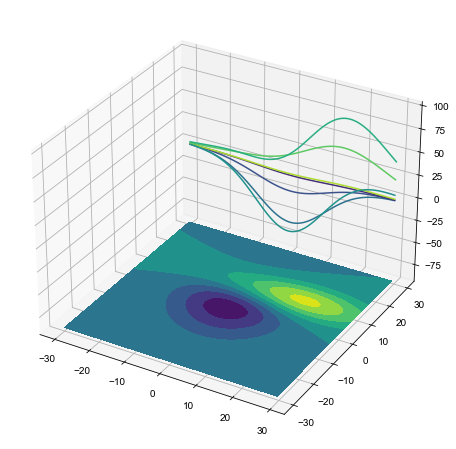

In [27]:
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

X,Y,Z = axes3d.get_test_data(0.05)
ax.set_zlim(-90,100)
# ax.plot_surface(X,Y,Z,rstride=1,cstride=1)

ax.contourf(X,Y,Z, zdir='z',offset=ax.get_zlim()[0])
# ax.contourf3D(X,Y,Z)
ax.contour(X,Y,Z, zdir='y',offset=30)


plt.show()

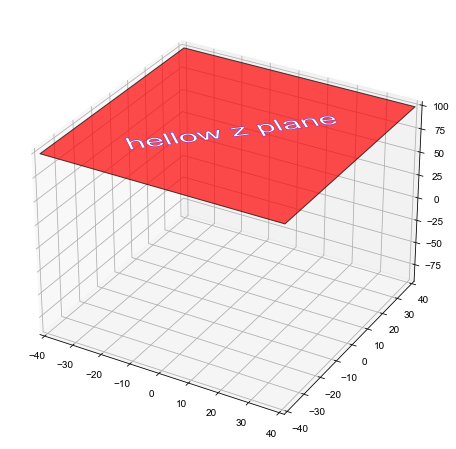

In [39]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_zlim(-90,100)

xmin,xmax,ymin,ymax,zmin,zmax=ax.get_xlim()[0], ax.get_xlim()[1],ax.get_ylim()[0], ax.get_ylim()[1], ax.get_zlim()[0], ax.get_zlim()[1]

verts=[
    [(xmin,ymin),(xmax,ymin),(xmax,ymax),(xmin,ymax),(xmin,ymin)]
]
poly = PolyCollection([verts[0]], facecolors='r', alpha=0.7, edgecolors='k')
ax.add_collection3d(poly, zs=zmax, zdir='z')
text3d(ax, (0,0,zmax),'hellow z plane', size=10,edgecolor='blue',linewidth=0.3, facecolor='w',ha='center', angle=45)


plt.show()

(95, 95) (95, 95) (95, 95)


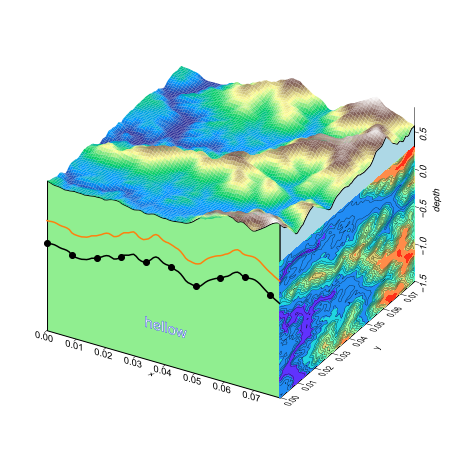

In [89]:
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)
region = np.s_[5:100, 5:100]
x, y, z = x[region], y[region], z[region]
x,y,z=x-x.min(),y-y.min(),z/1000

# plot
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d', proj_type='ortho') # persp
ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_zlim(-1.5, z.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('depth')

ls = LightSource(270, 45)
ax.plot_surface(x,y,z,rstride=1,cstride=1, lightsource=ls, cmap=cm.terrain)
# 2. 添加表面填充
xlim,ylim,zlim=ax.get_xlim(),ax.get_ylim(),ax.get_zlim()
xmin,xmax,ymin,ymax,zmin,zmax=xlim[0],xlim[1],ylim[0],ylim[1],zlim[0],zlim[1]

verts=[
       [(xmin,zmin),*zip(x[-1,:], z[-1,:]),(xmax,zmin),(xmin,zmin),(xmin,zmin)],
       [(ymin,zmin),(ymax,zmin),*zip(y[:,-1], z[:,-1]),(ymin,zmin)]]
for vert,zdir,zs,fc in zip(verts, ['y','x'],[ymin,xmax],['lightgreen','lightblue']):
    poly = PolyCollection([vert], facecolors=fc, alpha=1,edgecolors='k')
    ax.add_collection3d(poly, zs=zs, zdir=zdir)
    
# 
ax.plot(x[3,:],y[3,:]*0+ymin,z[3,:]-0.5, zorder=200)
# ax.plot(x[3,:],z[3,:]-0.5, zs=ymin, zdir='y', color='k', zorder=100)
ax.plot(x[3,:],z[3,:]-0.8, zs=ymin, zdir='y', color='k', zorder=100, marker='o', markevery=10)

# 
data=z.copy()
Y=np.linspace(ymin, ymax, data.shape[0])
Z = np.linspace(zmin,0.3, data.shape[1])
Y, Z =np.meshgrid(Y,Z)
print(data.shape, Y.shape, Z.shape)
ax.contourf(X=data, Y=Y, Z=Z, zdir='x', offset=xmax, cmap='rainbow')
ax.contour(X=data, Y=Y, Z=Z, zdir='x', offset=xmax, colors='k', linewidths=0.3,levels=20)

text3d(ax, (0.04, ymin, -1.0),'hellow ',zdir='y', size=0.005,edgecolor='blue',linewidth=0.3, facecolor='w',ha='center')

niceAxis(ax, fs_label=0.04, length_major=[0.02, 0.03, 0.02], color_major='None', frame_on=False)

    
plt.show()